# Logistic Regression

Imports and Helper Functions
---

In [37]:
%matplotlib inline
from ipywidgets import interactive_output
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Set Generation

In [38]:
N = 100
custom_datasets = {}

# Data in a straight line.
X = 20 * (np.random.rand(100, 1) - 0.5)
Y = 0.5 * X - 1.2 + np.random.randn(100, 1)
custom_datasets["Linear dataset"] = (X, Y,)

# Data in a quadratic curve.
Y = 0.1 * (X ** 2) + 0.5 * X - 2 + np.random.randn(100, 1)
custom_datasets["Quadratic dataset"] = (X, Y)

# Partial Iris dataset for classification. It has 2 classes. Original dataset has 3 classes.
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X, Y = X[:100], Y[:100]  # take partial data such that only 2 labels are chosen
perm = np.random.permutation(len(Y))
custom_datasets['Iris dataset'] = (X[perm], Y[perm])

# Moons dataset for classification. It has 2 classes.
X, Y = datasets.make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=None)
custom_datasets['Moons dataset'] = (X, Y)

# Circles dataset for classification. It has 2 classes.
X, Y = datasets.make_circles(n_samples=100, shuffle=True, noise=0.05, random_state=None, factor=0.8)
custom_datasets['Circles dataset'] = (X, Y)

In [39]:
def plot2d_data(x, y, markers):
    """Plot a 2d data set.
    x must be an Nx2 array of feature values. 
    y must be a N-long array of label values. The class labels
        must be integers between 1 and C.
    markers is a dict having keys as all unique labels and values as markers.
    """

    unique_labels = list(set(y))
    for i in unique_labels:
        plt.plot(x[y == i, 0], x[y == i, 1], markers[i], alpha=0.5)

## Logistic Regression Demo

In [44]:
def plot_log_reg_probalistic_classifier(
        lamb: float,
        dataset_name: str,
        N: int,
):
    assert N > 0, "Number of data points N should be >= 0. "
    plt.figure(figsize=(10,6))
    
    X, y = custom_datasets[dataset_name]
    X = X[:N]
    y = y[:N]
    class_names = ['-1', '+1']
    feature_names = ['x1', 'x2']
    markers = {0: 'sr', 1: '^b', 2: 'o'}

    # Find range of x and y for plotting purposes.
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Create coordinates for the plotting plane.
    gx1, gx2 = np.meshgrid(np.arange(x_min, x_max, 1 / 100.0), np.arange(y_min, y_max, 1 / 100.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l, gx2l)).T
    
    plot2d_data(X, y, markers)

    model = LogisticRegression(C=1 / (lamb + 1e-16))

    model.fit(X, y)
    gyhat = model.predict_proba(gx)[:, 1]
    gyhat = gyhat.reshape(gx1.shape)
    
    
    plt.contour(gx1, gx2, gyhat, levels=[0.5], linewidths=2, colors=["k"])
    plt.imshow(
        gyhat,
        interpolation='nearest',
        extent=(x_min, x_max, y_min, y_max),
        aspect='auto',
        origin='lower',
        cmap=plt.cm.bwr_r,
        alpha=0.25
    )
    
    # Find classification accuracy of the model.
    yhat = model.predict(X)
#     print('yhat={}'.format(yhat))
#     print('y={}'.format(y))
    accuracy = accuracy_score(y, yhat)
#     print('accuracy={}'.format(accuracy))
    
    plt.legend(class_names)
    plt.clim(0, 1)
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.title("{}, Accuracy={:.3g}".format(dataset_name, accuracy))
    plt.grid(True)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.colorbar()

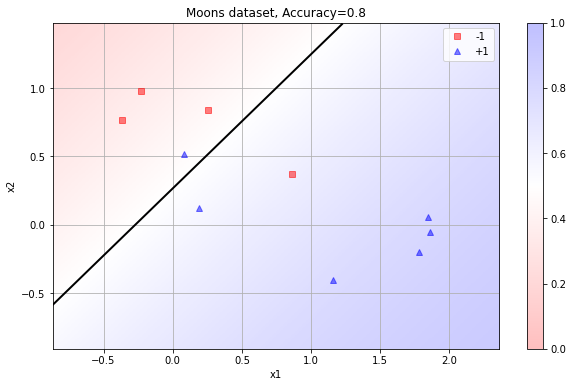

In [45]:
# Test with one example.
# plot_log_reg_probalistic_classifier(1.5, 'Moons dataset', 10)

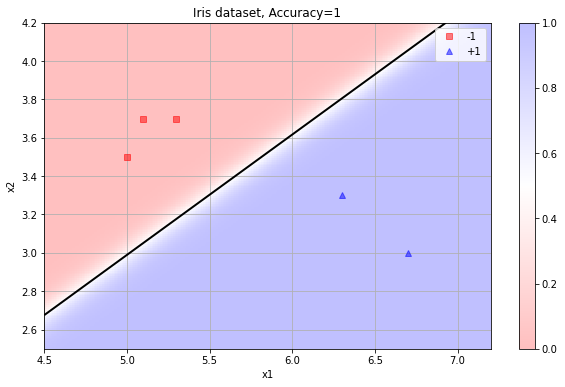

In [46]:
widget_lambda = widgets.FloatSlider(
    value=0,
    min=0,
    max=2.0,
    step=0.01,
    description='lambda:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

widget_dataset = widgets.Dropdown(
    options=["Iris dataset", "Moons dataset", "Circles dataset"],
    description="Dataset"
)

widget_N = widgets.IntSlider(value=0, min=5, max=N, step=1, description="N", continuous_update=False)

output = interactive_output(
    plot_log_reg_probalistic_classifier,
    {
        "lamb": widget_lambda,
        "dataset_name": widget_dataset,
        "N": widget_N,

    }
)

output.layout.height = '400px'
box1 = widgets.HBox([widget_lambda, widget_dataset, widget_N])
ui = widgets.VBox([box1])

Output(layout=Layout(height='400px'))

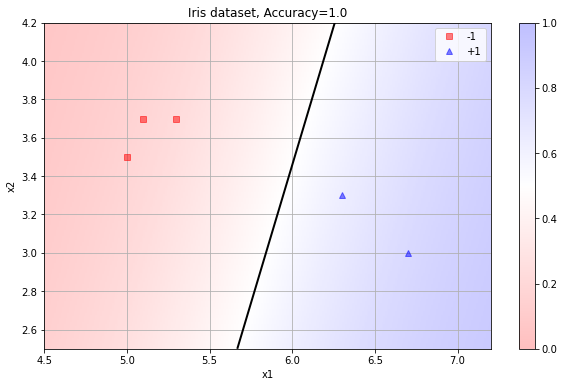

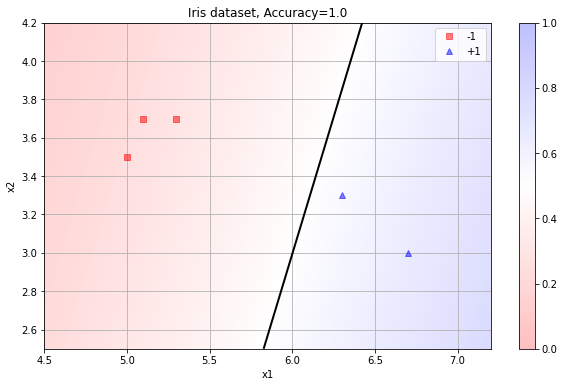

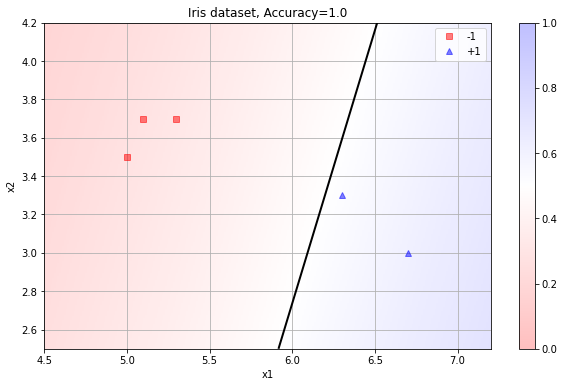

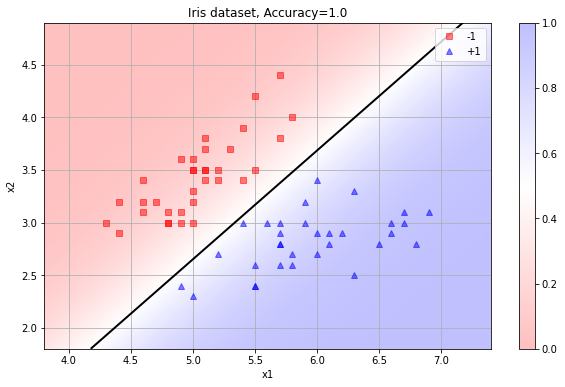

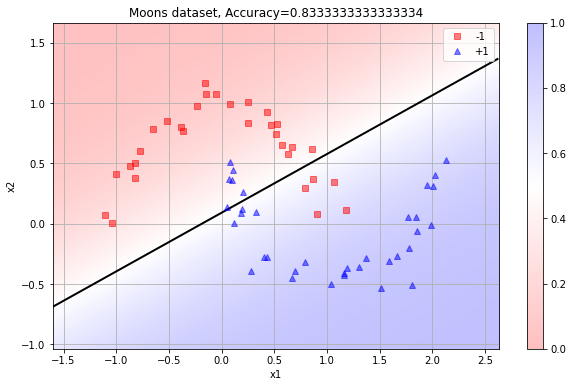

In [43]:
display(output, ui)